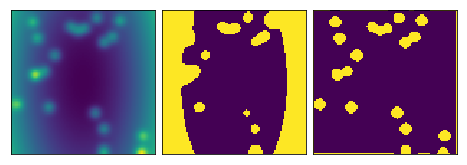

In [14]:
import numpy as np
import matplotlib.pyplot as mpl
import scipy.ndimage as ndimage
import skimage.filter as skif
# Generating data points with a non-uniform background
x = np.random.uniform(low=0, high=100, size=20).astype(int)
y = np.random.uniform(low=0, high=100, size=20).astype(int)
# Creating image with non-uniform background
func = lambda x, y: x**2 + y**2
grid_x, grid_y = np.mgrid[-1:1:100j, -2:2:100j]
bkg = func(grid_x, grid_y)
bkg = bkg / np.max(bkg)
# Creating points
clean = np.zeros((100,100))
clean[(x,y)] += 5
clean = ndimage.gaussian_filter(clean, 3)
clean = clean / np.max(clean)
# Combining both the non-uniform background
# and points
fimg = bkg + clean
fimg = fimg / np.max(fimg)
# Defining minimum neighboring size of objects
block_size = 3
# Adaptive threshold function which returns image
# map of structures that are different relative to
# background
adaptive_cut = skif.threshold_adaptive(fimg, block_size, offset=0)
# Global threshold
global_thresh = skif.threshold_otsu(fimg)
global_cut = fimg > global_thresh
# Creating figure to highlight difference between
# adaptive and global threshold methods
fig = mpl.figure(figsize=(8, 4))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
ax1 = fig.add_subplot(131)
ax1.imshow(fimg)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax2 = fig.add_subplot(132)
ax2.imshow(global_cut)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax3 = fig.add_subplot(133)
ax3.imshow(adaptive_cut)
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
mpl.show()

In [15]:
import numpy as np
import matplotlib.pyplot as mpl
import scipy.ndimage as ndimage
import skimage.morphology as morph
# Generating data points with a non-uniform background
x = np.random.uniform(low=0, high=200, size=20).astype(int)
y = np.random.uniform(low=0, high=400, size=20).astype(int)
# Creating image with non-uniform background
func = lambda x, y: np.cos(x)+ np.sin(y)
grid_x, grid_y = np.mgrid[0:12:200j, 0:24:400j]
bkg = func(grid_x, grid_y)
bkg = bkg / np.max(bkg)
# Creating points
clean = np.zeros((200,400))
clean[(x,y)] += 5
clean = ndimage.gaussian_filter(clean, 3)
clean = clean / np.max(clean)
# Combining both the non-uniform background
# and points
fimg = bkg + clean
fimg = fimg / np.max(fimg)
# Calculating local maxima
lm1 = morph.is_local_maximum(fimg)
x1, y1 = np.where(lm1.T == True)
# Creating figure to show local maximum detection
# rate success
fig = mpl.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.imshow(fimg)
ax.scatter(x1, y1, s=100, facecolor='none', edgecolor='#009999')
ax.set_xlim(0,400)
ax.set_ylim(0,200)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
mpl.show()

AttributeError: module 'skimage.morphology' has no attribute 'is_local_maximum'

In [22]:
X, y = make_regression(n_samples=100, n_features=2, n_informative=1,\
random_state=0, noise=50)
y

array([  -6.93224214,   -4.12640648,   29.47265153,  -12.03166314,
       -121.67258636, -149.24989393,  113.53496654,   -7.83638906,
        190.00097568,   49.48805247, -212.99678156,    2.18830846,
         64.26467148,   49.95787486,   91.27348051,  119.81223558,
        -20.7036038 ,  124.12659308,   83.48604481, -159.09767894,
        -28.38391171,  210.54089741,  -65.6362408 ,  -95.80728258,
       -133.39413114,  -43.00186876,  -86.54309532,  -85.84022596,
        -56.95028105,  -40.17616673,  -21.15743383, -152.72816927,
        -73.14427934,   85.99017661,   18.91233157,  -44.89873792,
         81.90208391,   97.15132452,   -9.61871875,  195.52714389,
        -10.4891272 ,  -56.08013836,   65.1732454 ,   80.96234141,
         90.02064653,  -15.21544918, -128.73046505,   49.36304394,
        -36.63682396,  128.31929799,  -68.10313731,  -62.21980777,
       -127.29590913, -136.59042386,   59.54136549,   54.14645648,
        -31.94436796,   90.40709597,   59.04981282,   17.73993

[-10.25691752  90.5463984 ]
[ 350.86036386]
0.949827492261


C:\Users\Shyam\Anaconda2\envs\snakes\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


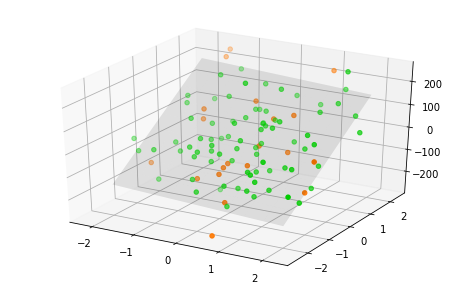

In [23]:
import numpy as np
import matplotlib.pyplot as mpl
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
from sklearn.datasets.samples_generator import make_regression
# Generating synthetic data for training and testing
X, y = make_regression(n_samples=100, n_features=2, n_informative=1,\
random_state=0, noise=50)
# X and y are values for 3D space. We first need to train
# the machine, so we split X and y into X_train, X_test,
# y_train, and y_test. The *_train data will be given to the
# model to train it.
X_train, X_test = X[:80], X[-20:]
y_train, y_test = y[:80], y[-20:]
# Creating instance of model
regr = linear_model.LinearRegression()
# Training the model
regr.fit(X_train, y_train)
# Printing the coefficients
print(regr.coef_)
# [-10.25691752 90.5463984 ]
# Predicting y-value based on training
X1 = np.array([1.2, 4])
print(regr.predict(X1))
# 350.860363861
# With the *_test data we can see how the result matches
# the data the model was trained with.
# It should be a good match as the *_train and *_test
# data come from the same sample. Output: 1 is perfect
# prediction and anything lower is worse.
print(regr.score(X_test, y_test))
# 0.949827492261
fig = mpl.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
# ax = Axes3D(fig)
# Data
ax.scatter(X_train[:,0], X_train[:,1], y_train, facecolor='#00CC00')
ax.scatter(X_test[:,0], X_test[:,1], y_test, facecolor='#FF7800')
# Function with coefficient variables
coef = regr.coef_
line = lambda x1, x2: coef[0] * x1 + coef[1] * x2
grid_x1, grid_x2 = np.mgrid[-2:2:10j, -2:2:10j]
ax.plot_surface(grid_x1, grid_x2, line(grid_x1, grid_x2),
alpha=0.1, color='k')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.zaxis.set_visible(False)
mpl.show()